<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Kiểm-soát-Thứ-mà-bạn-Không-thấy" data-toc-modified-id="Kiểm-soát-Thứ-mà-bạn-Không-thấy-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Kiểm soát Thứ mà bạn Không thấy</a></span></li><li><span><a href="#Hiệu Ứng Cố Định" data-toc-modified-id="Hiệu Ứng Cố Định-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Hiệu Ứng Cố Định</a></span></li><li><span><a href="#Biểu-diễn-Hiệu Ứng Cố Định" data-toc-modified-id="Biểu-diễn-Hiệu Ứng Cố Định-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Biểu diễn Hiệu Ứng Cố Định</a></span></li><li><span><a href="#Hiệu-ứng-thời-gian" data-toc-modified-id="Hiệu-ứng-thời-gian-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Hiệu ứng thời gian</a></span></li><li><span><a href="#Khi-Dữ Liệu Bảng-Không-thể-Giúp-bạn" data-toc-modified-id="Khi-Dữ Liệu Bảng-Không-thể-Giúp-bạn-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Khi Dữ Liệu Bảng Không thể Giúp bạn</a></span></li><li><span><a href="#Ý-tưởng-chủ-đạo" data-toc-modified-id="Ý-tưởng-chủ-đạo-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Ý tưởng chủ đạo</a></span></li><li><span><a href="#Tài-liệu-tham-khảo" data-toc-modified-id="Tài-liệu-tham-khảo-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Tài liệu tham khảo</a></span></li></ul></div>

## Kiểm soát Điều mà bạn Không thấy
Các phương pháp như điểm xu hướng, hồi quy tuyến tính và ghép cặp rất tốt để kiểm soát nhiễu khi sử dụng dữ liệu không ngẫu nhiên, nhưng chúng lệ thuộc vào một giả thiết quan trọng: không nhiễu có điều kiện:

$
(Y_0, Y_1) \perp T | X
$

Nghĩa là chúng đòi hỏi tất cả các biến nhiễu đều đã được biết và đo lường, vì thế chúng ta có thể cố định chúng và khiến can thiệp tốt như thể ngẫu nhiên. Thách thức chính với điều này là đôi khi chúng ta không thể đo lường một biến nhiễu nào đó. Ví dụ, trong một bài toán kinh tế lao động cổ điển: ước lượng tác động thu nhập của hôn nhân đối với nam giới. Một sự thật được biết rộng rãi trong Kinh tế học là nam giới đã lập gia đình có thu nhập cao hơn nam giới độc thân. Điều còn chưa sáng tỏ là liệu mối quan hệ này có tính nhân quả hay không. Có thể do những người có học vấn tốt thường dễ kết hôn và đồng thời có thu nhập tốt hơn, nghĩa là học vấn là một biến nhiễu của tác động đối với thu nhập của hôn nhân. Ý thức được yếu tố gây nhiễu này, chúng ta có thể đo lường học vấn của các cá nhân tham gia nghiên cứu và chạy một mô hình hồi quy kiểm soát nó. Nhưng một biến nhiễu tiềm năng khác là độ điển trai. Có khả năng những người điển trai dễ kết hôn và cũng dễ kiếm được công việc thu nhập tốt. Đáng tiếc là độ điển trai không phải một đặc tính kiểu như trí tuệ. Nó không hề dễ định lượng chút nào.  

Điều này đặt chúng ta vào một tình thế rất khó khăn, vì nếu chúng ta có những biễn nhiễu không được đo lường, chúng ta có thiên lệch. Một giải pháp là sử dụng biến công cụ, giống như chúng ta đã thấy trong bài trước. Nhưng tìm ra biến công cụ tốt không dễ và đòi hỏi rất nhiều sự sáng tạo. Ở đây chúng ta sẽ tìm hiểu một biện pháp khác tận dụng yếu tố thời gian và cấu trúc thời gian của dữ liệu. 

Ý tưởng là sử dụng **dữ liệu bảng**. Dữ liệu bảng là khi ta có **nhiều quan sát cho cùng một đối tượng trong nhiều khoảng thời gian khác nhau**. Dữ liệu bảng rất phổ biến trong kinh doanh, nơi mà người ta lưu giữ các bản ghi về hành vi tiêu dùng của cùng một khách hàng tại nhiều thời điểm. Lý do để ta sử dụng dữ liệu bảng là vì nó cho phép ta so sánh cùng một đối tượng trước và sau can thiệp và theo dõi hành vi của họ. Trước khi đi sâu vào các công thức toán, hãy xem nó có ý nghĩa trực quan như thế nào.

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from matplotlib import style
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf
import graphviz as gr

from linearmodels.panel import PanelOLS


%matplotlib inline
pd.set_option("display.max_columns", 6)
style.use("fivethirtyeight")

Trước hết, hãy nhìn vào đồ thị nhân quả mà chúng ta đã xây dựng cho nhiều quan sát của cùng một đối tượng theo thời gian. Giả sử chúng ta có tình huống mà tình trạng hôn nhân tại thời điểm 1 chi phối thu nhập ở cùng thời điểm và tình trạng hôn nhân ngay sau đó. Điều này cũng áp dụng cho thời điểm 2 và 3. Và giả sử độ điển trai là như nhau ở các thời điểm (giả định này quá cứng nhắc, nhưng có thể phù hợp nếu khoảng cách thời gian đủ ngắn ví dụ một vài năm) và nó chi phối cả tình trạng hôn nhân lẫn thu nhập.


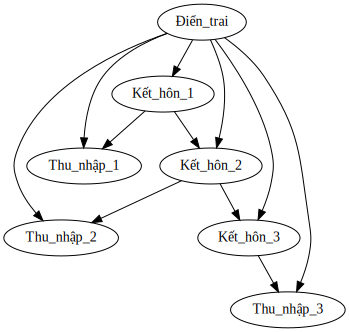

In [3]:
g = gr.Digraph()
g.edge("Kết_hôn_1", "Thu_nhập_1")
g.edge("Kết_hôn_1", "Kết_hôn_2")
g.edge("Kết_hôn_2", "Thu_nhập_2")
g.edge("Kết_hôn_2", "Kết_hôn_3")
g.edge("Kết_hôn_3", "Thu_nhập_3")

g.edge("Điển_trai", "Kết_hôn_1")
g.edge("Điển_trai", "Kết_hôn_2")
g.edge("Điển_trai", "Kết_hôn_3")

g.edge("Điển_trai", "Thu_nhập_1")
g.edge("Điển_trai", "Thu_nhập_2")
g.edge("Điển_trai", "Thu_nhập_3")

g

Lưu ý là chúng ta không thể kiểm soát độ điển trai vì chúng ta không thể lượng hóa nó. Nhưng chúng ta vẫn có thể sử dụng cấu trúc bảng và yếu tố này không còn là trở ngại nữa. Ý tưởng là chúng ta có thể thấy độ điển trai - cũng như nhiều đặc điểm khác không thay đổi theo thời gian như các đặc tính của một người. Và mặc dù chúng ta không thể kiểm soát các đặc tính này một cách trực tiếp, chúng ta có thể kiểm soát luôn bản thân đối tượng được nghiên cứu.

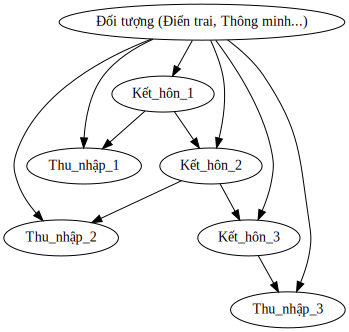

In [4]:
g = gr.Digraph()
g.edge("Kết_hôn_1", "Thu_nhập_1")
g.edge("Kết_hôn_1", "Kết_hôn_2")
g.edge("Kết_hôn_2", "Thu_nhập_2")
g.edge("Kết_hôn_2", "Kết_hôn_3")
g.edge("Kết_hôn_3", "Thu_nhập_3")

g.edge("Đối tượng (Điển trai, Trí tuệ...)", "Kết_hôn_1")
g.edge("Đối tượng (Điển trai, Trí tuệ...)", "Kết_hôn_2")
g.edge("Đối tượng (Điển trai, Trí tuệ...)", "Kết_hôn_3")

g.edge("Đối tượng (Điển trai, Trí tuệ...)", "Thu_nhập_1")
g.edge("Đối tượng (Điển trai, Trí tuệ...)", "Thu_nhập_2")
g.edge("Đối tượng (Điển trai, Trí tuệ...)", "Thu_nhập_3")

g

Thử nghĩ xem. Chúng ta không biết các đặc tính như điển trai, trí tuệ, nhưng chúng ta biết chúng cùng thuộc về một người. Vì thế, chúng tạo ra một biến giả để xác định người đó và đưa nó vào một mô hình tuyến tính. Đây là điều chúng ta nhắc tới ở trên khi chúng ta kiểm soát đối tượng được nghiên cứu. Khi ước lượng tác động của hôn nhân đối với thu nhập sử dụng biến giả chỉ người trong mô hình của chúng ta, mô hình hồi quy sẽ xác định tác động của hôn nhân khi **giữ cố định người được nghiên cứu**. Việc thêm vào biến giả này được gọi là mô hình hiệu ứng cố định.

## Hiệu Ứng Cố Định

Để mô tả vấn đề bằng công thức toán học, trước hết hãy nhìn vào dữ liệu mà chúng ta có. Trong ví dụ trên, chúng ta muốn ước lượng tác động của hôn nhân đối với thu nhập. Dữ liệu gồm 2 biến `kết_hôn` và `log_lương`, cho nhiều đối tượng (`nr`) qua nhiều năm. Lưu ý là tiền lương đã được lấy log. Thêm vào đó, chúng ta đưa vào các biến kiểm soát khác như số giờ làm việc mỗi năm, số năm học vấn,...

In [5]:
from linearmodels.datasets import wage_panel
data = wage_panel.load()
data.head()

,nr,year,black,...,lwage,expersq,occupation
0,13,1980,0,...,1.197540,1,9
1,13,1981,0,...,1.853060,4,9
2,13,1982,0,...,1.344462,9,9
3,13,1983,0,...,1.433213,16,9
4,13,1984,0,...,1.568125,25,5


Generally, the fixed effect model is defined as

$
y_{it} = \beta X_{it} + \gamma U_i + e_{it}
$

where \\(y_{it}\\) is the outcome of individual \\(i\\) at time \\(t\\), \\(X_{it}\\) is the vector of variables for individual \\(i\\) at time \\(t\\), \\(U_i\\) is a set of unobservables for individual \\(i\\) that are unchanging through time, hence the lack of the time subscript, and \\(e_{it}\\) is the error term. For the education example, \\(y_{it}\\) is log wages,  \\(X_{it}\\) are the observable variables that change in time, like marriage and experience and \\(U_i\\) are the variables that are not observed but constant for each individual, like beauty and intelligence. 


Now, remember how I've said that using panel data with a fixed effect model is as simple as adding a dummy for the entities. It's true, but in practice, we don't actually do it. Imagine a dataset where we have 1 million customers. If we add one dummy for each of them, we would end up with 1 million columns, which is probably not a good idea. Instead, we use the trick of partitioning the linear regression into 2 separate models. We've seen this before, but now is a good time to recap it. Suppose you have a linear regression model with a set of features \\(X_1\\) and another set of features \\(X_2\\).

$
\hat{Y} = \hat{\beta_1} X_1 + \hat{\beta_2} X_2
$

You can get the exact same \\(\hat{\beta_1}\\) parameter by doing

1. regress the the outcome \\(y\\) on the second set of features \\(\hat{y^*} = \hat{\gamma_1} X_2\\)
2. regress the first set of features on the second \\(\hat{X_1} = \hat{\gamma_2} X_2\\)
3. obtain the residuals \\(\tilde{X}_1 = X_1 - \hat{X_1}\\) and \\(\tilde{y}_1 = y_1 - \hat{y^*}\\)
4. regress the residuals of the outcome on the residuals of the features \\(\hat{y} = \hat{\beta_1} \tilde{X}_1\\)

The parameter from this last regression will be exactly the same as running the regression with all the features. But how exactly does this help us? Well, we can break the estimation of the model with the entity dummies into 2. First, we use the dummies to predict the outcome and the feature. These are steps 1 and 2 above. 

Now, remember how running a regression on a dummy variable is as simple as estimating the mean for that dummy? If you don't, let's use our data to show how this is true. Let's run a model where we predict wages as a function of the year dummy. 

Thông thường mô hình hiệu ứng cố định được mô tả như sau:

$
y_{it} = \beta X_{it} + \gamma U_i + e_{it}
$

trong đó \\(y_{it}\\) là kết quả của cá nhân \\(i\\) tại thời điểm \\(t\\), \\(X_{it}\\) là véc-tơ  chứa các biến số của cá nhân \\(i\\) tại thời điểm \\(t\\), \\(U_i\\) là các biến không quan sát được không đổi theo thời gian của cá nhân \\(i\\)  (vì thế không có chỉ số thời gian), và \\(e_{it}\\) là phần dư. Trong ví dụ về giáo dục, \\(y_{it}\\) là log tiền lương,  \\(X_{it}\\) là các biến quan sát được thay đổi theo thời gian, như tình trạng hôn nhân và kinh nghiệm và \\(U_i\\) là các biến không được quan sát nhưng không đổi cho mỗi cá nhân, như vẻ điển trai và trí tuệ. 

Nào hãy nhớ lại những gì tôi đã nói. Sử dụng dữ liệu bảng với mô hình hiệu ứng cố định đơn giản giống như đưa vào mô hình các biến giả cho các đối tượng. Điều này đúng, nhưng trong thực tế, chúng ta thường không làm vậy. Hãy tưởng tượng một bộ dữ liệu với 1 triệu khách hàng. Nếu chúng ta đưa thêm 1 biến giả cho mỗi khách hàng, chúng ta sẽ phải tạo thêm 1 triệu cột dữ liệu nữa, và đó không phải ý hay. Thay vào đó, chúng ta sẽ sử dụng một mẹo, phân tách mô hình hồi quy tuyến tính thành 2 mô hình. Chúng ta từng nhìn thấy nó trước đây, nhưng bây giờ là lúc thích hợp để ôn lại. Giả sử bạn có một mô hình hồi quy tuyến tính với một nhóm các thuộc tính \\(X_1\\) và một nhóm các thuộc tính khác \\(X_2\\).

$
\hat{Y} = \hat{\beta_1} X_1 + \hat{\beta_2} X_2
$

Bạn có thể thu được giá trị chính xác của \\(\hat{\beta_1}\\) bằng cách:

1. hồi quy kết quả \\(y\\) theo nhóm các thuộc tính thứ hai \\(\hat{y^*} = \hat{\gamma_1} X_2\\)
2. hồi quy mỗi thuộc tính trong nhóm thứ nhất theo nhóm thứ hai  \\(\hat{X_1} = \hat{\gamma_2} X_2\\)
3. tính toán các phần dư \\(\tilde{X}_1 = X_1 - \hat{X_1}\\) và \\(\tilde{y}_1 = y_1 - \hat{y^*}\\)
4. hồi quy phần dư của kết quả theo phần dư của các thuộc tính \\(\hat{y} = \hat{\beta_1} \tilde{X}_1\\)

Tham số thu được từ mô hình hồi quy sau cùng sẽ giống hệt nếu ta chạy hồi quy theo tất cả các thuộc tính. Nhưng điều này có thể giúp ích chúng ta như thế nào? Chúng ta có thể phân chia việc ước lượng mô hình với các biến giả đối tượng thành hai. Trước hết, chúng ta sử dụng các biến giả để dự đoán kết quả và các thuộc tính. Chúng tương ứng với các bước 1 và 2 trên đây. 

Nào, hãy nhớ rằng việc chạy hồi quy theo biến giả  đơn giản chỉ là ước lượng giá trị trung bình theo biến giả đó phải không? Nếu bạn không đồng ý, chúng ta hãy sử dụng dữ liệu để chứng minh. Hãy chạy một mô hình để dự đoán lương theo biến giả năm. 

In [6]:
mod = smf.ols("lwage ~ C(year)", data=data).fit()
mod.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,1.3935,0.022,63.462,0.000,1.350,1.437
C(year)[T.1981],0.1194,0.031,3.845,0.000,0.059,0.180
C(year)[T.1982],0.1782,0.031,5.738,0.000,0.117,0.239
C(year)[T.1983],0.2258,0.031,7.271,0.000,0.165,0.287
C(year)[T.1984],0.2968,0.031,9.558,0.000,0.236,0.358
C(year)[T.1985],0.3459,0.031,11.140,0.000,0.285,0.407
C(year)[T.1986],0.4062,0.031,13.082,0.000,0.345,0.467
C(year)[T.1987],0.4730,0.031,15.232,0.000,0.412,0.534


Hãy lưu ý cách mô hình này dự đoán mức lương bình quân cho năm 1980 là 1.3935, năm 1981 là {{1.3935+0.1194}} (1.3935+0.1194), và tương tự cho các năm khác. Bây giờ nếu chúng ta tính giá trị trung bình theo năm, chúng ta thu được kết quả giống hệt (cộng giá trị hệ số chặn với hệ số của các năm để thu được giá trị trung bình năm).

In [7]:
data.groupby("year")["lwage"].mean()

year
1980    1.393477
1981    1.512867
1982    1.571667
1983    1.619263
1984    1.690295
1985    1.739410
1986    1.799719
1987    1.866479
Name: lwage, dtype: float64

Điều này nghĩa là việc tính giá trị trung bình cho mỗi người trong bảng của chúng ta tương đương với việc hồi quy các biến khác theo các biến giả cho cá nhân. Điều này gợi ý quy trình ước lượng sau:

1. Tạo ra các biến khử giá trị trung bình theo thời gian bằng cách trừ đi giá trị trung bình của mỗi cá nhân:   
\\(\ddot{Y}_{it} = Y_{it} -  \bar{Y}_i\\)  
\\(\ddot{X}_{it} = X_{it} -  \bar{X}_i\\)
2. Chạy mô hình hồi quy \\(\ddot{Y}_{it}\\) theo \\(\ddot{X}_{it}\\)

Chú ý rằng, các biến không quan sát được và không đổi theo thời gian \\(U_i\\) tiêu biến, vì \\(\bar{U_i}=U_i\\):

\begin{align}
Y_{it} & = \beta X_{it} + \gamma U_i + e_{it} \\
\bar{Y}_{i} & = \beta \bar{X}_{it} + \gamma U_i + \bar{e}_{it} \\
(Y_{it} - \bar{Y}_{i}) & = (\beta X_{it} - \beta \bar{X}_{it}) + (\gamma U_i - \gamma U_i) + (e_{it}-\bar{e}_{it}) \\
(Y_{it} - \bar{Y}_{i}) & = \beta(X_{it} - \bar{X}_{it}) + (e_{it}-\bar{e}_{it}) \\
\ddot{Y}_{it} & = \beta \ddot{X}_{it} + \ddot{e}_{it} \\
\end{align}

Thực ra không chỉ các biến không quan sát được và không đổi theo thời gian tiêu biến. Điều này xảy ra cả với các biến quan sát được và không đổi theo thời gian. Vì lí do này, bạn không thể đưa vào mô hình bất kì biến nào không đổi theo thời gian, vì chúng sẽ tạo thành một  tổ hợp tuyến tính với các biến giả và mô hình sẽ không hoạt động.

![img](./data/img/fixed-effects/demeaned.png)

Để kiểm tra các biến này, chúng ta chỉ cần nhóm dữ liệu theo cá nhân và tính tổng của độ lệch chuẩn. Giá trị của biến số nào bằng 0 thì biến đó cố định cho mỗi đối tượng. 

In [8]:
data.groupby("nr").std().sum()

year            1334.971910
black              0.000000
exper           1334.971910
hisp               0.000000
hours         203098.215649
married          140.372801
educ               0.000000
union            106.512445
lwage            173.929670
expersq        17608.242825
occupation       739.222281
dtype: float64

Trong dữ liệu của chúng ta, cần phải loại bỏ các biến giả cho chủng tộc như `black` và `hisp`, vì chúng cố định cho mỗi cá nhân. Hơn nữa, chúng ta phải loại bỏ học vấn `eudc`. Chúng ta cũng sẽ không sử dụng nghề nghiệp vì nó có thể đóng vai trò trung gian cho tác động của hôn nhân đối với tiền lương (Ví dụ những người độc thân có thể làm những công việc dài giờ hơn). 

Để chạy mô hình hiệu ứng cố định, trước hết, hãy tính dữ liệu trung bình.

In [9]:
Y = "lwage"
T = "married"
X = [T, "expersq", "union", "hours"]

mean_data = data.groupby("nr")[X+[Y]].mean()
mean_data.head()

,married,expersq,union,hours,lwage
nr,,,,,
13,0.000,25.5,0.125,2807.625,1.255652
17,0.000,61.5,0.000,2504.125,1.637786
18,1.000,61.5,0.000,2350.500,2.034387
45,0.125,35.5,0.250,2225.875,1.773664
110,0.500,77.5,0.125,2108.000,2.055129


Để khử giá trị trung bình (theo thời gian) của dữ liệu, chúng ta cần đặt chỉ số của dữ liệu gốc trùng với chỉ số cá nhân, `nr`. Sau đó chúng ta đơn giản chỉ cần lấy giá trị khung dữ liệu trừ đi giá trị trung bình của khung dữ liệu.

In [2]:
deamed_data = (data
               .set_index("nr") # set the index as the person indicator
               [X+[Y]]
               - mean_data) # subtract the mean data

deamed_data.head()

NameError: name 'data' is not defined

Cuối cùng, chúng ta có thể chạy mô hình hiệu ứng cố định sử dụng dữ liệu đã khử giá trị trung bình theo thời gian.

In [11]:
mod = smf.ols(f"{Y} ~ {'+'.join(X)}", data=deamed_data).fit()
mod.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-8.327e-17,0.005,-1.64e-14,1.000,-0.010,0.010
married,0.1147,0.017,6.756,0.000,0.081,0.148
expersq,0.0040,0.000,21.958,0.000,0.004,0.004
union,0.0784,0.018,4.261,0.000,0.042,0.115
hours,-8.46e-05,1.25e-05,-6.744,0.000,-0.000,-6e-05


Nếu chúng ta tin rằng hiệu ứng cố định loại trừ hoàn toàn thiên lệch thiếu biến, mô hình này cho ta biết việc kết hôn làm tăng thu nhập của nam giới thêm 11%. Kết quả này có ý nghĩa thống kê. Một chi tiết ở đây là đối với mô hình hiệu ứng cố định, các sai số chuẩn cần được nhóm cụm. Do đó thay vì tính ước lượng bằng tay (chỉ phù hợp cho lý do sư phạm), chúng ta có thể dùng thư viện `linearmodels` và đặt tham số thực `cluster_entity` là True.

In [12]:
from linearmodels.panel import PanelOLS
mod = PanelOLS.from_formula("lwage ~ expersq+union+married+hours+EntityEffects",
                            data=data.set_index(["nr", "year"]))

result = mod.fit(cov_type='clustered', cluster_entity=True)
result.summary.tables[1]

,Parameter,Std. Err.,T-stat,P-value,Lower CI,Upper CI
expersq,0.0040,0.0002,16.552,0.0000,0.0035,0.0044
union,0.0784,0.0236,3.3225,0.0009,0.0322,0.1247
married,0.1147,0.0220,5.2213,0.0000,0.0716,0.1577
hours,-8.46e-05,2.22e-05,-3.8105,0.0001,-0.0001,-4.107e-05


Bạn có thể thấy các ước lượng hệ số giống với trường hợp sử dụng dữ liệu đã khử giá trị trung bình theo thời gian. Khác biệt duy nhất là các sai số chuẩn lớn hơn một chút. Nào, hãy so sánh chúng với OLS model đơn giản không tận dụng cấu trúc thời gian của dữ liệu. Với mô hình này, chúng ta đưa trở lại các biến không đổi theo thời gian.

In [14]:
mod = smf.ols("lwage ~ expersq+union+married+hours+black+hisp+educ", data=data).fit()
mod.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.2654,0.065,4.103,0.000,0.139,0.392
expersq,0.0032,0.000,15.750,0.000,0.003,0.004
union,0.1829,0.017,10.598,0.000,0.149,0.217
married,0.1410,0.016,8.931,0.000,0.110,0.172
hours,-5.32e-05,1.34e-05,-3.978,0.000,-7.94e-05,-2.7e-05
black,-0.1347,0.024,-5.679,0.000,-0.181,-0.088
hisp,0.0132,0.021,0.632,0.528,-0.028,0.054
educ,0.1057,0.005,22.550,0.000,0.097,0.115


Mô hình này cho rằng kết hôn làm tăng tiền lương của nam giới thêm 14%. Mức tác động này cao hơn kết quả chúng ta tìm được với mô hình hiệu ứng cố định. Điều này gợi ý rằng có thiên lệch thiếu biến do các yếu tố cố định theo từng cá nhân, như trí tuệ và độ điển trai chưa được đưa vào mô hình. 

## Biểu diễn Hiệu Ứng Cố Định
Để mở rộng hiểu biết về cách  mô hình hiệu ứng cố định hoạt động, hãy cùng xem xét một ví dụ khác. Giả sử bạn làm việc cho một công ty công nghệ và cần ước lượng tác động của chiến dịch marketing billboard (biển quảng cáo ngoài trời) cho dịch vụ mua bán qua ứng dụng. Khi nhìn vào dữ liệu quá khứ, bạn nhận thấy phòng marketing có xu hướng chi tiền cho biển quảng cáo ở các thành phố có lượng mua hàng thấp. Điều này có lí phải không? Họ đã chẳng cần marketing nhiều nếu nơi đó có lượng bán hàng ồ ạt. Nếu bạn chạy một mô hình hồi quy sử dụng dữ liệu này thì sẽ trông như thể chi phí marketing cao dẫn đến lượng mua hàng qua ứng dụng thấp.

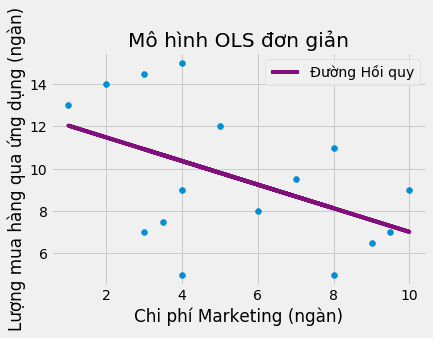

In [18]:
toy_panel = pd.DataFrame({
    "mkt_costs":[5,4,3.5,3, 10,9.5,9,8, 4,3,2,1, 8,7,6,4],
    "purchase":[12,9,7.5,7, 9,7,6.5,5, 15,14.5,14,13, 11,9.5,8,5],
    "city":["C0","C0","C0","C0", "C2","C2","C2","C2", "C1","C1","C1","C1", "C3","C3","C3","C3"]
})

m = smf.ols("purchase ~ mkt_costs", data=toy_panel).fit()

plt.scatter(toy_panel.mkt_costs, toy_panel.purchase)
plt.plot(toy_panel.mkt_costs, m.fittedvalues, c="C5", label="Đường Hồi quy")
plt.xlabel("Chi phí Marketing (ngàn)")
plt.ylabel("Lượng mua hàng qua ứng dụng (ngàn)")
plt.title("Mô hình OLS đơn giản")
plt.legend();

Hiểu rõ về suy luận nhân quả, bạn quyết định chạy một mô hình hiệu ứng cố định, đưa các biến chỉ báo thành phố dưới dạng các biến giả vào mô hình. Mô hình hiệu ứng cố định kiểm soát các đặc tính của thành phố không đổi theo thời gian, nếu một thành phố còn e dè với sản phẩm của bạn, nó sẽ nắm bắt điều này. Khi chạy mô hình này, cuối cùng bạn cũng thấy việc tăng thêm chi phí marketing quả thật mang lại lượng mua hàng qua ứng dụng nhiều hơn.

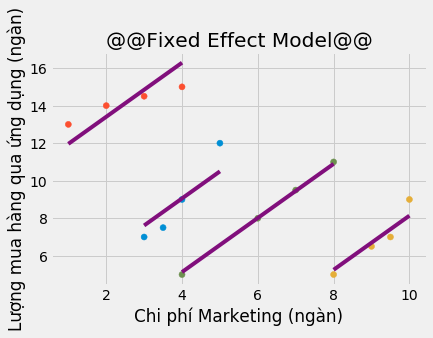

In [20]:
fe = smf.ols("purchase ~ mkt_costs + C(city)", data=toy_panel).fit()

fe_toy = toy_panel.assign(y_hat = fe.fittedvalues)

plt.scatter(toy_panel.mkt_costs, toy_panel.purchase, c=toy_panel.city)
for city in fe_toy["city"].unique():
    plot_df = fe_toy.query(f"city=='{city}'")
    plt.plot(plot_df.mkt_costs, plot_df.y_hat, c="C5")

plt.title("Mô Hình Hiệu Ứng Cố Định")
plt.xlabel("Chi phí Marketing (ngàn)")
plt.ylabel("Lượng mua hàng qua ứng dụng (ngàn)");

Hãy dành một phút để đánh giá đồ thị phía trên và để nó cho bạn biết thực ra hiệu ứng cố định đang làm gì. Chú ý rằng hiệu ứng cố định đang ước lượng **một đường hồi quy cho mỗi thành phố**. Và hãy lưu ý các đường này song song với nhau. Độ dốc của đường hồi quy là tác động của chi phí marketing với lượng mua hàng qua ứng dụng. Vì thế **hiệu ứng cố định giả định rằng tác động nhân quả không đổi theo đối tượng**, trong trường hợp này là các địa bàn thành phố. Đây có thể là điểm yếu và cũng có thể là điểm mạnh, phụ thuộc vào việc bạn dùng nó vào việc gì. Nó là điểm yếu nếu bạn muốn tìm hiểu tác động nhân quả cụ thể cho từng thành phố. Vì mô hình FE giả định tác động này cố định theo đối tượng, bạn sẽ không thấy khác biệt trong tác động nhân quả. Tuy nhiên, nếu bạn muốn đánh giá tác động tổng thể của marketing với lượng mua hàng qua ứng dụng, cấu trúc dữ liệu bảng sẽ rất hữu dụng cho hiệu ứng cố định. 

## Hiệu ứng thời gian

Giống như những gì chúng ta đã làm với hiệu ứng cố định cho các cá nhân, chúng ta có thể thiết kế một mô hình hiệu ứng cố định cho thời gian. Nếu ta đưa vào mô hình một biến giả cho mỗi cá nhân để kiểm soát các đặc tính cố định cho mỗi cá nhân,  ta có thể đưa vào các biến giả thời gian để kiểm soát các biến không đổi theo thời gian. Một ví dụ là biến lạm phát. Mức giá và tiền lương có xu hướng tăng theo thời gian. Nếu tiền lương và tỉ lệ kết hôn cũng tăng theo thời gian, thì thời gian là một biến nhiễu. Một ví dụ chặt chẽ hơn, giả sử tỉ lệ kết hôn tăng theo thời gian. Vì lạm phát làm mức lương tăng theo thời gian, một phần tương quan cùng chiều ta thấy giữa việc kết hôn và mức lương đơn giản là do cả hai đang tăng theo thời gian. Để sửa chữa nó, ta có thể đưa vào một biến biến giả cho mỗi thời điểm. Trong `linear models`, điều này được thực hiện dễ dàng bằng cách thêm `TimeEffects` vào công thức của chúng ta và đặt giá trị `cluster_time` bằng True.

In [21]:
mod = PanelOLS.from_formula("lwage ~ expersq+union+married+hours+EntityEffects+TimeEffects",
                            data=data.set_index(["nr", "year"]))

result = mod.fit(cov_type='clustered', cluster_entity=True, cluster_time=True)
result.summary.tables[1]

,Parameter,Std. Err.,T-stat,P-value,Lower CI,Upper CI
expersq,-0.0062,0.0008,-8.1479,0.0000,-0.0077,-0.0047
union,0.0727,0.0228,3.1858,0.0015,0.0279,0.1174
married,0.0476,0.0177,2.6906,0.0072,0.0129,0.0823
hours,-0.0001,3.546e-05,-3.8258,0.0001,-0.0002,-6.614e-05


Trong mô hình mới này, tác động của hôn nhân đối với tiền lương giảm mạnh từ `0.1147` xuống `0.0476`. Kết quả này vẫn có ý nghĩa thống kê ở mức 99%, vì thế nam giới vẫn có thể kì vọng tăng lương nhờ vào kết hôn. 

## Khi Dữ Liệu Bảng Không thể Giúp bạn

Sử dụng dữ liệu bảng và mô hình hiệu ứng cố định là công cụ vô cùng hiệu quả cho suy luận nhân quả. Khi bạn không có dữ liệu ngẫu nhiên hoặc biến công cụ tốt, hiệu ứng cố định là phương tiện suy luận nhân quả thuyết phục với dữ liệu phi thực nghiệm. Tuy vậy nó không phải liều thuốc vạn năng. Có những tình huống mà ngay cả dữ liệu bảng không thể giúp bạn.

Trường hợp dễ thấy nhất là khi bạn có các biến nhiễu thay đổi theo thời gian. Hiệu Ứng Cố Định chỉ có thể loại bỏ thiên lệch từ các thuộc tính cố định theo cá nhân. Ví dụ, giả sử trí tuệ được tăng cường khi đọc nhiều sách và tiêu thụ nhiều chất béo tốt. Điều này giúp bạn kiếm được công việc tốt và lấy được vợ. Hiệu ứng cố định sẽ không thể loại bỏ  loại thiên lệch phát sinh từ nhiễu trí tuệ không được đo lường vì trong ví dụ này trí tuệ thay đổi theo thời gian. 

![img](./data/img/fixed-effects/time-travel.png)

Một trường hợp khác khó thấy hơn là khi hiệu ứng cố định không thể giúp khi bạn gặp phải **quan hệ nhân quả ngược**. Ví dụ, hãy nói rằng việc kết hôn không làm tăng thu nhập của bạn. Phải chăng thu nhập cao làm tăng khả năng kết hôn của bạn? Trong trường hợp này, bạn sẽ thấy mối tương quan cùng chiều nhưng mức thu nhập được định trước. Chúng sẽ cùng thay đổi theo thời gian và theo cùng một hướng, vì vậy hiệu ứng cố định sẽ không thể kiểm soát được điều này. 

## Ý tưởng chủ đạo

Trong bài này chúng ta đã thấy cách sử dụng dữ liệu bảng, loại dữ liệu với nhiều kết quả đo cho cùng cá nhân tại các thời điểm khác nhau. Trong trường hợp này, chúng ta cần sử dụng mô hình hiệu ứng cố định kiểm soát các thuộc tính cố định theo thời gian của mỗi đối tượng. Đây là một phương pháp rất hiệu quả và thuyết phục để kiểm soát các biến nhiễu và có thể áp dụng tốt cho dữ liệu không ngẫu nhiên.

Cuối cùng, chúng ta đã thấy FE không phải liều thuốc vạn năng. Chúng ta đã nắm được hai tình huống mà phương pháp này ít tác dụng: khi chúng ta có quan hệ nhân quả ngược và khi các biến nhiễu không đo được thay đổi theo thời gian.

## Tài liệu tham khảo

Tôi muốn dành loạt bài viết này để vinh danh Joshua Angrist, Alberto Abadie and Christopher Walters vì khóa học Kinh tế lượng tuyệt cú mèo của họ. Phần lớn ý tưởng trong loạt bài này được lấy từ các bài giảng của họ được tổ chức bởi Hiệp hội Kinh tế Mĩ.  Theo dõi các bài giảng này là những gì tôi làm trong suốt năm 2020 khó nhằn.
* [Kinh tế lượng với dữ liệu chéo](https://www.aeaweb.org/conference/cont-ed/2017-webcasts)
* [Luyện chưởng Kinh tế lượng Gần như Vô hại](https://www.aeaweb.org/conference/cont-ed/2020-webcasts)

Tôi cũng muốn giới thiệu cuốn sách lý thú của Angrist. Chúng cho tôi thấy Kinh tế lượng, hoặc 'Lượng theo cách họ gọi không chỉ vô cùng hữu ích mà còn rất vui.

* [Kinh tế lượng Gần như Vô hại](https://www.mostlyharmlesseconometrics.com/)
* [Luyện chưởng 'Lượng](https://www.masteringmetrics.com/)

Tài liệu tham khảo cuối cùng của tôi là cuốn sách của Miguel Hernan and Jamie Robins. Nó là người bạn đồng hành tin cậy với tôi khi trả lời những câu hỏi nhân quả khó nhằn.

* [Sách Suy Luận Nhân Quả](https://www.hsph.harvard.edu/miguel-hernan/causal-inference-book/)

Cuối cùng, tôi cũng muốn tán dương Scott Cunningham và và sản phẩm xuất sắc của ông pha trộn Suy Luận Nhân Quả với lời thoại Rap:

* [Suy Luận Nhân Quả: Đĩa nhạc](https://www.scunning.com/mixtape.html)

# Bảng Từ Viết tắt 
|Viết tắt| Tiếng Anh | Tiếng Việt |
| --- | --- | --- | 
|FE|Fixed Effects|FE| 


# Bảng Thuật ngữ 
| Thuật ngữ | Tiếng Anh |
| --- | --- | 
|biến|variable| 
|biến công cụ|instrumental-variable, instrumental variable, instrument, instrument variable| 
|biến giả|dummy, dummy variable| 
|biến nhiễu|confounder, confounding variable| 
|biễn nhiễu không được đo lường|unmeasured confounder| 
|bảng|panel| 
|cấu trúc bảng|panel structure| 
|cố định|condition on| 
|dữ liệu|data| 
|dữ liệu bảng|panel data| 
|dữ liệu không ngẫu nhiên|non-random data| 
|dữ liệu ngẫu nhiên|random data| 
|dữ liệu phi thực nghiệm|non experimental data| 
|dữ liệu đã khử giá trị trung bình theo thời gian|time-demeaned data| 
|dự đoán|predict, prediction| 
|ghép cặp|matching| 
|giả thiết|assumption| 
|hiệu ứng cố định|fixed-effect, fixed effects| 
|hệ số chặn|intercept| 
|hồi quy|regression, regress| 
|hồi quy tuyến tính|linear regression| 
|khung dữ liệu|data frame| 
|không nhiễu có điều kiện|conditional unconfoundedness| 
|khử giá trị trung bình (theo thời gian)|deamean| 
|khử giá trị trung bình theo thời gian|time-demeaned| 
|kinh tế lượng|econometrics| 
|kết quả|outcome| 
|mô hình|model| 
|mô hình fe|fe model| 
|mô hình hiệu ứng cố định|fixed effects model, fixed effect model| 
|mô hình hồi quy|regression model| 
|mô hình hồi quy tuyến tính|linear regression model| 
|mô hình tuyến tính|linear model| 
|nhóm cụm|clustered| 
|phần dư|error term, residual| 
|quan hệ nhân quả ngược|reverse causality| 
|quan sát|observe, observation| 
|sai số chuẩn|standard error| 
|suy luận nhân quả|causal inference, causal reasoning| 
|tham số|parameter| 
|tham số thực|true parameter, argument| 
|thiên lệch|bias| 
|thiên lệch thiếu biến|omitted variable bias| 
|thuộc tính|feature| 
|thư viện|library| 
|tổ hợp tuyến tính|linear combination| 
|véc-tơ|vector| 
|điểm xu hướng|propensity score| 
|đường hồi quy|fitted line, regression line| 
|độ dốc|slope| 
|độ lệch chuẩn|standard deviation| 
|ước lượng hệ số|parameter estimate| 
